In [13]:
import pandas as pd
import numpy as np
import re
import nltk


In [6]:
dataset=pd.read_csv("twitter_data-checkpoint.csv")
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [7]:
dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [8]:
dataset.info

<bound method DataFrame.info of        Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                           

In [9]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [11]:
dataset["labels"] = dataset["class"].map({0: "Hate Speech",
                                          1:"Offensive language",
                                          2:" No Hate or Offensive Language"})
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate or Offensive Language
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No Hate or Offensive Language
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive language


In [12]:
data=dataset[["tweet","labels"]]
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate or Offensive Language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive language
24779,"you've gone and broke the wrong heart baby, an...",No Hate or Offensive Language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive language
24781,youu got wild bitches tellin you lies,Offensive language


In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Likith
[nltk_data]     Goshike\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:
import string
stopwords = set(nltk.corpus.stopwords.words("english"))
stopwords.add("rt")
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [18]:
stemmer = nltk.SnowballStemmer("english")
def data_clean(text):
    text = str(text).lower()
    text = re.sub("hhtps?://S+www/.S+","",text)
    text = re.sub("[.*?]","",text)
    text = re.sub("<.+?>+","",text)
    text = re.sub("[%s]"%re.escape(string.punctuation),"",text)
    text = re.sub("/n","",text)
    text = re.sub("/w*/d/w*","",text)
    words = [stemmer.stem(word) for word in text.split(' ') if word not in stopwords]
    text="".join(words)
    return text
data["tweet"] = data["tweet"].apply(data_clean)

C:\Users\Likith Goshike\AppData\Local\Temp\ipykernel_20816\922604770.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(data_clean)


In [19]:
data

,tweet,labels
0,mayasolovwomanshouldntcomplaincleanhousampmana...,No Hate or Offensive Language
1,mleew17boydatcoldtygadwnbadcuffindathoe1stplace,Offensive language
2,urkindofbranddawg80sbaby4lifeverfuckbitchstart...,Offensive language
3,cgandersonvivabaslookliketranni,Offensive language
4,shenikarobertshithearmighttruemightfakerbitcht...,Offensive language
...,...,...
24778,yousmuthafinlie8220lifeask20pearlcoreyemanuelr...,Offensive language
24779,youvgonebrokewrongheartbabidroveredneckcrazi,No Hate or Offensive Language
24780,youngbuckwannaeatdatnigguhlikeaintfuckindis,Offensive language
24781,youugotwildbitchtellinlie,Offensive language


In [20]:
X = np.array(data["tweet"])
y = np.array(data["labels"])

In [23]:
import sklearn
import sklearn.model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [24]:
cv = CountVectorizer()
X = cv.fit_transform(X)
X

<24783x26048 sparse matrix of type '<class 'numpy.int64'>'
	with 26262 stored elements in Compressed Sparse Row format>

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train) 

DecisionTreeClassifier()

In [27]:
y_pred = dt.predict(X_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[   3,    0, 1235],
       [   0,    1,  423],
       [   1,    3, 5769]], dtype=int64)

In [29]:
print(classification_report(y_test,y_pred))

                                precision    recall  f1-score   support

 No Hate or Offensive Language       0.75      0.00      0.00      1238
                   Hate Speech       0.25      0.00      0.00       424
            Offensive language       0.78      1.00      0.87      5773

                      accuracy                           0.78      7435
                     macro avg       0.59      0.33      0.29      7435
                  weighted avg       0.74      0.78      0.68      7435



In [30]:
print(dt.max_depth)

None


In [34]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

<Axes: >

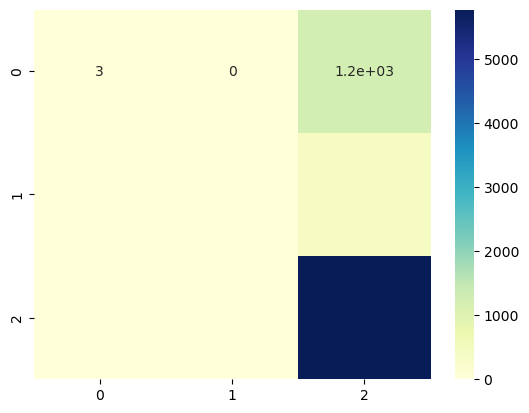

In [35]:
sns.heatmap(cm,annot = True,cmap = "YlGnBu")

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7764626765299261

In [37]:
sample = " Let's unite and kill all the men who are violate against the women "
sample = data_clean(sample)

In [38]:
sample

'letunitkillmenviolatwomen'

In [39]:
data1 = cv.transform([sample]).toarray()
data1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [1]:
dt.predict(data1)

NameError: name 'dt' is not defined